In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
pd.set_option('max_colwidth', 600)

In [2]:
survey_df = pd.read_csv("C:/Users/odunz/Downloads/Project 3/survey.csv")
survey_df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [3]:
survey_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
survey_df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [5]:
emp_interview_df = survey_df.drop(['state', 'self_employed','Gender', 'family_history', 'treatment', 'work_interfere','remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'obs_consequence', 'comments'],axis=1)

In [6]:
employee_conditions_df = emp_interview_df.rename(columns = {'Timestamp': 'Years', 'Age': 'Age', 'Countries': 'Country', 'no_employees': '# of Employees', 'mental_health_interview': 'Mental Health Interview', 'phys_health_interview': 'Physical Health Interview', 'mental_vs_physical': 'Mental & Physical'})

employee_conditions_df.head()


,Years,Age,Country,# of Employees,Mental Health Interview,Physical Health Interview,Mental & Physical
0,2014-08-27 11:29:31,37,United States,6-25,No,Maybe,Yes
1,2014-08-27 11:29:37,44,United States,More than 1000,No,No,Don't know
2,2014-08-27 11:29:44,32,Canada,6-25,Yes,Yes,No
3,2014-08-27 11:29:46,31,United Kingdom,26-100,Maybe,Maybe,No
4,2014-08-27 11:30:22,31,United States,100-500,Yes,Yes,Don't know


In [7]:
employee_conditions_df.to_csv("C:/Users/odunz/Downloads/Project 3/Employees_condition.csv")
employee_conditions_df.head()


,Years,Age,Country,# of Employees,Mental Health Interview,Physical Health Interview,Mental & Physical
0,2014-08-27 11:29:31,37,United States,6-25,No,Maybe,Yes
1,2014-08-27 11:29:37,44,United States,More than 1000,No,No,Don't know
2,2014-08-27 11:29:44,32,Canada,6-25,Yes,Yes,No
3,2014-08-27 11:29:46,31,United Kingdom,26-100,Maybe,Maybe,No
4,2014-08-27 11:30:22,31,United States,100-500,Yes,Yes,Don't know


In [8]:
mental_physical_df = employee_conditions_df

In [9]:
mental_physical_df.loc[(mental_physical_df['# of Employees']=="More than 1000")|(mental_physical_df['# of Employees']=="500-1000")]

,Years,Age,Country,# of Employees,Mental Health Interview,Physical Health Interview,Mental & Physical
1,2014-08-27 11:29:37,44,United States,More than 1000,No,No,Don't know
13,2014-08-27 11:33:26,36,United States,500-1000,No,No,Don't know
23,2014-08-27 11:36:24,41,United States,More than 1000,No,Yes,Don't know
25,2014-08-27 11:37:08,35,United States,More than 1000,No,Yes,No
32,2014-08-27 11:39:31,30,United Kingdom,500-1000,No,Yes,Don't know
...,...,...,...,...,...,...,...
1239,2015-04-04 11:22:05,30,Netherlands,500-1000,Maybe,Yes,Don't know
1243,2015-05-05 14:22:18,43,United States,More than 1000,No,No,Don't know
1244,2015-05-05 15:16:25,32,United Kingdom,More than 1000,No,Yes,No
1253,2015-08-25 19:59:38,36,United States,More than 1000,No,No,Don't know


In [10]:
split_column = mental_physical_df['Years'].str.split('-', expand = True)
split_column

,0,1,2
0,2014,08,27 11:29:31
1,2014,08,27 11:29:37
2,2014,08,27 11:29:44
3,2014,08,27 11:29:46
4,2014,08,27 11:30:22
...,...,...,...
1254,2015,09,12 11:17:21
1255,2015,09,26 01:07:35
1256,2015,11,07 12:36:58
1257,2015,11,30 21:25:06


In [11]:
split_column[0][0]

'2014'

In [12]:
mental_physical_df['Year'] = split_column[0][0]
mental_physical_df

,Years,Age,Country,# of Employees,Mental Health Interview,Physical Health Interview,Mental & Physical,Year
0,2014-08-27 11:29:31,37,United States,6-25,No,Maybe,Yes,2014
1,2014-08-27 11:29:37,44,United States,More than 1000,No,No,Don't know,2014
2,2014-08-27 11:29:44,32,Canada,6-25,Yes,Yes,No,2014
3,2014-08-27 11:29:46,31,United Kingdom,26-100,Maybe,Maybe,No,2014
4,2014-08-27 11:30:22,31,United States,100-500,Yes,Yes,Don't know,2014
...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,United Kingdom,26-100,No,No,Don't know,2014
1255,2015-09-26 01:07:35,32,United States,26-100,No,No,Yes,2014
1256,2015-11-07 12:36:58,34,United States,More than 1000,No,No,No,2014
1257,2015-11-30 21:25:06,46,United States,100-500,No,No,No,2014


In [13]:
year_condition_df = mental_physical_df.drop(columns = { 'Years'})
year_condition_df

,Age,Country,# of Employees,Mental Health Interview,Physical Health Interview,Mental & Physical,Year
0,37,United States,6-25,No,Maybe,Yes,2014
1,44,United States,More than 1000,No,No,Don't know,2014
2,32,Canada,6-25,Yes,Yes,No,2014
3,31,United Kingdom,26-100,Maybe,Maybe,No,2014
4,31,United States,100-500,Yes,Yes,Don't know,2014
...,...,...,...,...,...,...,...
1254,26,United Kingdom,26-100,No,No,Don't know,2014
1255,32,United States,26-100,No,No,Yes,2014
1256,34,United States,More than 1000,No,No,No,2014
1257,46,United States,100-500,No,No,No,2014


In [14]:
year_condition_df.loc[(year_condition_df['# of Employees']=="More than 1000")|(year_condition_df['# of Employees']=="500-1000")]

,Age,Country,# of Employees,Mental Health Interview,Physical Health Interview,Mental & Physical,Year
1,44,United States,More than 1000,No,No,Don't know,2014
13,36,United States,500-1000,No,No,Don't know,2014
23,41,United States,More than 1000,No,Yes,Don't know,2014
25,35,United States,More than 1000,No,Yes,No,2014
32,30,United Kingdom,500-1000,No,Yes,Don't know,2014
...,...,...,...,...,...,...,...
1239,30,Netherlands,500-1000,Maybe,Yes,Don't know,2014
1243,43,United States,More than 1000,No,No,Don't know,2014
1244,32,United Kingdom,More than 1000,No,Yes,No,2014
1253,36,United States,More than 1000,No,No,Don't know,2014


In [15]:
employees_df = year_condition_df.loc[(year_condition_df['# of Employees']=="More than 1000")]
employees_df

,Age,Country,# of Employees,Mental Health Interview,Physical Health Interview,Mental & Physical,Year
1,44,United States,More than 1000,No,No,Don't know,2014
23,41,United States,More than 1000,No,Yes,Don't know,2014
25,35,United States,More than 1000,No,Yes,No,2014
39,35,United States,More than 1000,Maybe,Maybe,Yes,2014
41,35,United States,More than 1000,No,Maybe,Don't know,2014
...,...,...,...,...,...,...,...
1238,28,United States,More than 1000,No,No,No,2014
1243,43,United States,More than 1000,No,No,Don't know,2014
1244,32,United Kingdom,More than 1000,No,Yes,No,2014
1253,36,United States,More than 1000,No,No,Don't know,2014


In [16]:
country_health_df = employees_df[['Country','Mental Health Interview','Physical Health Interview','# of Employees','Mental & Physical']]
country_health_df

,Country,Mental Health Interview,Physical Health Interview,# of Employees,Mental & Physical
1,United States,No,No,More than 1000,Don't know
23,United States,No,Yes,More than 1000,Don't know
25,United States,No,Yes,More than 1000,No
39,United States,Maybe,Maybe,More than 1000,Yes
41,United States,No,Maybe,More than 1000,Don't know
...,...,...,...,...,...
1238,United States,No,No,More than 1000,No
1243,United States,No,No,More than 1000,Don't know
1244,United Kingdom,No,Yes,More than 1000,No
1253,United States,No,No,More than 1000,Don't know


In [17]:
mental_interview_df = employees_df[['Country','Physical Health Interview','# of Employees']]
mental_interview_df.head()

,Country,Physical Health Interview,# of Employees
1,United States,No,More than 1000
23,United States,Yes,More than 1000
25,United States,Yes,More than 1000
39,United States,Maybe,More than 1000
41,United States,Maybe,More than 1000


In [18]:
physical_interview_df = employees_df[['Country','Mental Health Interview', '# of Employees']]
physical_interview_df

,Country,Mental Health Interview,# of Employees
1,United States,No,More than 1000
23,United States,No,More than 1000
25,United States,No,More than 1000
39,United States,Maybe,More than 1000
41,United States,No,More than 1000
...,...,...,...
1238,United States,No,More than 1000
1243,United States,No,More than 1000
1244,United Kingdom,No,More than 1000
1253,United States,No,More than 1000


In [19]:
Yes_interview_df= country_health_df.loc[country_health_df['Mental Health Interview'] == 'Yes']
Yes_interview_df = Yes_interview_df['Mental Health Interview'].value_counts(0)
Yes_interview_df

Yes    6
Name: Mental Health Interview, dtype: int64

In [20]:
Yes_interview_df= country_health_df.loc[country_health_df['Mental Health Interview'] == 'No']
Yes_interview_df = Yes_interview_df['Mental Health Interview'].value_counts()
Yes_interview_df

No    251
Name: Mental Health Interview, dtype: int64

In [21]:
Yes_interview_df= country_health_df.loc[country_health_df['Mental Health Interview'] == 'Maybe']
Yes_interview_df = Yes_interview_df['Mental Health Interview'].value_counts()
Yes_interview_df

Maybe    25
Name: Mental Health Interview, dtype: int64

In [22]:
Yes_interview2_df= country_health_df.loc[country_health_df['Physical Health Interview'] == 'Yes']
Yes_interview2_df = Yes_interview2_df['Physical Health Interview'].value_counts()
Yes_interview2_df

Yes    44
Name: Physical Health Interview, dtype: int64

In [23]:
Yes_interview2_df= country_health_df.loc[country_health_df['Physical Health Interview'] == 'No']
Yes_interview2_df = Yes_interview2_df['Physical Health Interview'].value_counts()
Yes_interview2_df

No    131
Name: Physical Health Interview, dtype: int64

In [24]:
Yes_interview2_df= country_health_df.loc[country_health_df['Physical Health Interview'] == 'Maybe']
Yes_interview2_df = Yes_interview2_df['Physical Health Interview'].value_counts()
Yes_interview2_df

Maybe    107
Name: Physical Health Interview, dtype: int64

In [25]:
Yes_interview3_df= country_health_df.loc[country_health_df['Mental & Physical'] == 'Yes']
Yes_interview3_df = Yes_interview3_df['Mental & Physical'].value_counts()
Yes_interview3_df

Yes    71
Name: Mental & Physical, dtype: int64

In [26]:
Yes_interview3_df= country_health_df.loc[country_health_df['Mental & Physical'] == "Don't know"]
Yes_interview3_df = Yes_interview3_df['Mental & Physical'].value_counts()
Yes_interview3_df

Don't know    123
Name: Mental & Physical, dtype: int64

In [27]:
Yes_interview3_df= country_health_df.loc[country_health_df['Mental & Physical'] == 'No']
Yes_interview3_df = Yes_interview3_df['Mental & Physical'].value_counts()
Yes_interview3_df

No    88
Name: Mental & Physical, dtype: int64

In [28]:
interview_question_df = country_health_df.loc[employees_df['Mental Health Interview'] =='Yes']
interview_question_df.head()

,Country,Mental Health Interview,Physical Health Interview,# of Employees,Mental & Physical
429,United States,Yes,Yes,More than 1000,Yes
773,United Kingdom,Yes,Yes,More than 1000,No
777,United Kingdom,Yes,Yes,More than 1000,Yes
870,United States,Yes,Yes,More than 1000,Yes
934,United States,Yes,Yes,More than 1000,No


In [29]:
interview_question2_df =country_health_df.loc[employees_df['Physical Health Interview'] == 'Yes']
interview_question2_df.head()

,Country,Mental Health Interview,Physical Health Interview,# of Employees,Mental & Physical
23,United States,No,Yes,More than 1000,Don't know
25,United States,No,Yes,More than 1000,No
76,United States,Maybe,Yes,More than 1000,Yes
130,United States,No,Yes,More than 1000,No
154,United Kingdom,No,Yes,More than 1000,No


In [30]:
interview_question3_df = country_health_df.groupby(["# of Employees"]).count()["Mental & Physical"]
interview_question3_df

# of Employees
More than 1000    282
Name: Mental & Physical, dtype: int64

In [31]:
year_condition_df.to_csv("C:/Users/odunz/Downloads/Project 3/listupdate.csv")

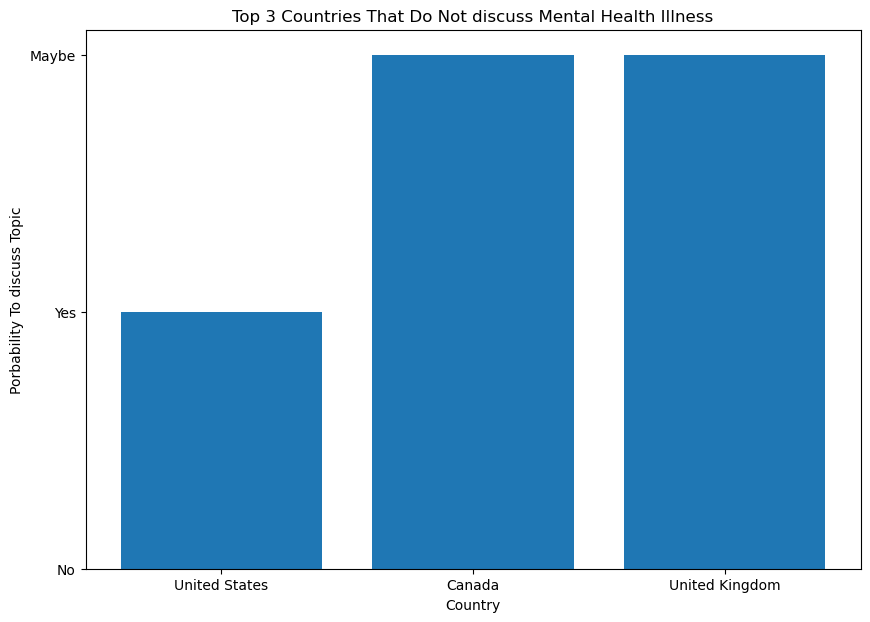

In [32]:
data = pd.read_csv("C:/Users/odunz/Downloads/Project 3/updatedlist.csv")
data.head()
df = pd.DataFrame(data)
 
Country = df['Country'].head(12)
Mental_physical_df = df['Mental Health Interview'].head(12)
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(Country[0:10], Mental_physical_df[0:10])
plt.title('Top 3 Countries That Do Not discuss Mental Health Illness')
plt.xlabel('Country')
plt.ylabel('Porbability To discuss Topic')
# Show Plot
plt.show()

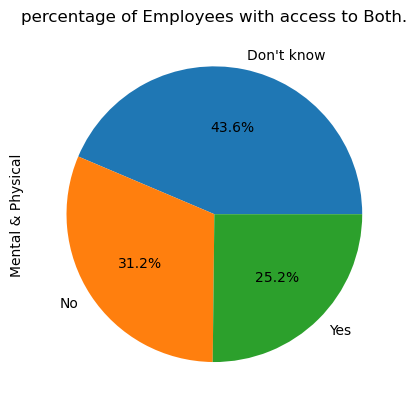

In [33]:
mental_physical_df = country_health_df["Mental & Physical"].value_counts()
plt.title("percentage of Employees with access to Both.")
mental_physical_df.plot.pie(autopct= "%1.1f%%")
plt.show()


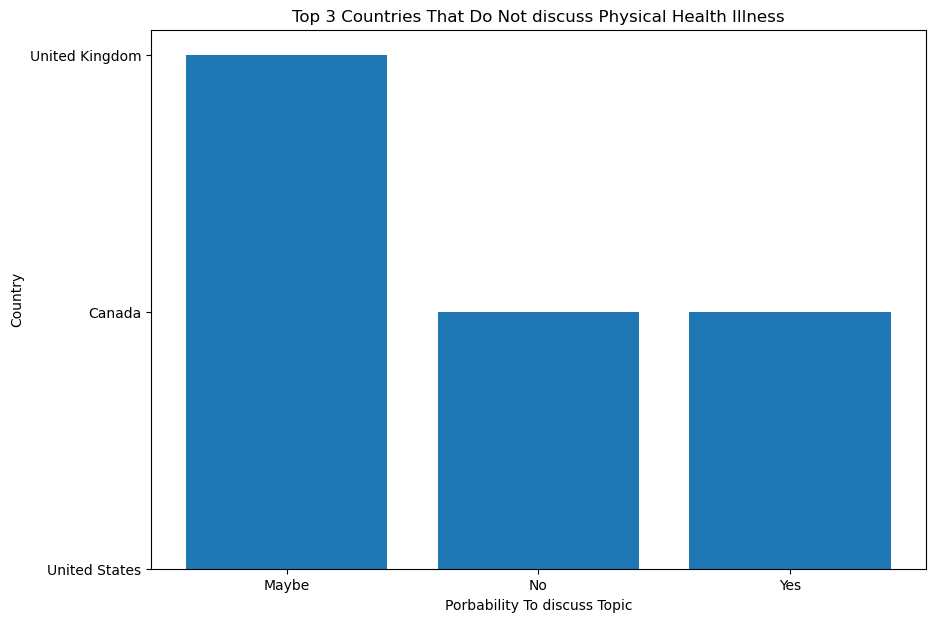

In [34]:
data = pd.read_csv("C:/Users/odunz/Downloads/Project 3/updatedlist.csv")
data.head()
df = pd.DataFrame(data)
 
Country = df['Physical Health Interview'].head(12)
Mental_physical_df = df['Country'].head(12)
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(Country[0:10], Mental_physical_df[0:10])
plt.title('Top 3 Countries That Do Not discuss Physical Health Illness')
plt.xlabel('Porbability To discuss Topic')
plt.ylabel('Country')
# Show Plot
plt.show()

In [35]:
conditions_df = data[["# of Employees","Mental Health Interview"]]
conditions_df.head()

,# of Employees,Mental Health Interview
0,6-25,No
1,More than 1000,No
2,6-25,Yes
3,26-100,Maybe
4,100-500,Yes


In [36]:
table_df = sm.stats.Table.from_data(conditions_df)
print(table_df.table_orig)

Mental Health Interview  Maybe   No  Yes
# of Employees                          
1-5                         31  121   10
100-500                     26  144    6
26-100                      52  225   12
500-1000                     7   51    2
6-25                        66  216    8
More than 1000              25  251    6


In [37]:
conditions2_df = data[["Country","Mental & Physical"]]
conditions2_df.head()

,Country,Mental & Physical
0,United States,Yes
1,United States,Don't know
2,Canada,No
3,United Kingdom,No
4,United States,Don't know


In [38]:
table_df2 = sm.stats.Table.from_data(country_health_df)
print(table_df2.table_orig)

Mental Health Interview  Maybe   No  Yes
Country                                 
Australia                    1    2    0
Belgium                      0    1    0
Canada                       0   10    0
Germany                      0    3    0
India                        1    1    0
Ireland                      0    5    0
Israel                       0    1    0
Italy                        0    1    0
Mexico                       0    1    0
Netherlands                  0    1    0
New Zealand                  0    1    0
Philippines                  0    1    0
Poland                       0    1    0
Singapore                    0    1    0
Sweden                       0    2    0
Switzerland                  0    3    0
United Kingdom               4   22    3
United States               19  194    3


In [39]:
conditions3_df = data[["Country","Physical Health Interview"]]
conditions3_df.head()

,Country,Physical Health Interview
0,United States,Maybe
1,United States,No
2,Canada,Yes
3,United Kingdom,Maybe
4,United States,Yes
